In [1]:
import numpy as np

from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt

In [2]:
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

2024-06-24 02:10:10.978103: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-06-24 02:10:11.442405: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-06-24 02:10:12.424873: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


Num GPUs Available:  1


2024-06-24 02:10:13.667820: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:984] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-06-24 02:10:13.866707: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:984] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-06-24 02:10:13.866756: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:984] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.


Dataset balanceada. 

In [3]:
# ExTRAEMOS LA DATASET BALANCEADA
# bal_all = np.loadtxt('/content/drive/MyDrive/FYP/A1_A2_A3_B_data/Data_csv/bal_healthy.csv', delimiter=',')
bal_all = np.loadtxt('Balanced data/bal_healthy.csv', delimiter=',') #Healthy. 
bal_ins = np.loadtxt('Balanced data/bal_ins.csv', delimiter=',') #ins 
bal_narco = np.loadtxt('Balanced data/bal_narco.csv', delimiter=',') #narco 
bal_plm = np.loadtxt('Balanced data/bal_plm.csv', delimiter=',') #plm 

In [4]:
#Manejo de la data

x_bal = bal_all[:,0:1024]
y_bal = bal_all[:,1024]
y_bal=y_bal.reshape(-1,1 )

x_ins = bal_ins[:,0:1024]
y_ins = bal_ins[:,1024]
y_ins=y_ins.reshape(-1,1 )

x_narco = bal_narco[:,0:1024]
y_narco = bal_narco[:,1024]
y_narco=y_narco.reshape(-1,1 )

x_plm = bal_plm[:,0:1024]
y_plm = bal_plm[:,1024]
y_plm=y_plm.reshape(-1,1 )




In [5]:
from keras.utils import to_categorical
enc = OneHotEncoder(handle_unknown='ignore')
enc.fit(y_bal)
onehotlabels = enc.transform(y_bal).toarray()
onelabel=np.absolute(1-onehotlabels[:,0])
onelabel=(onelabel.reshape(-1,1)).astype(int)
x_train1, x_test1, y_train1, y_test1 = train_test_split(x_bal, onelabel, test_size = 0.2, shuffle = True)
num_classes=2
y_train1_encoded = to_categorical(y_train1, num_classes=num_classes)
y_test1_encoded = to_categorical(y_test1, num_classes=num_classes)

enc = OneHotEncoder(handle_unknown='ignore')
enc.fit(y_ins)
onehotlabels = enc.transform(y_ins).toarray()
onelabel=np.absolute(1-onehotlabels[:,0])
onelabel=(onelabel.reshape(-1,1)).astype(int)
x_train1_ins, x_test1_ins, y_train1, y_test1 = train_test_split(x_ins, onelabel, test_size = 0.2, shuffle = True)
num_classes=2
y_train1_encoded_ins = to_categorical(y_train1, num_classes=num_classes)
y_test1_encoded_ins = to_categorical(y_test1, num_classes=num_classes)

enc = OneHotEncoder(handle_unknown='ignore')
enc.fit(y_narco)
onehotlabels = enc.transform(y_narco).toarray()
onelabel=np.absolute(1-onehotlabels[:,0])
onelabel=(onelabel.reshape(-1,1)).astype(int)
x_train1_narco, x_test1_narco, y_train1, y_test1 = train_test_split(x_narco, onelabel, test_size = 0.2, shuffle = True)
num_classes=2
y_train1_encoded_narco = to_categorical(y_train1, num_classes=num_classes)
y_test1_encoded_narco = to_categorical(y_test1, num_classes=num_classes)

enc = OneHotEncoder(handle_unknown='ignore')
enc.fit(y_plm)
onehotlabels = enc.transform(y_plm).toarray()
onelabel=np.absolute(1-onehotlabels[:,0])
onelabel=(onelabel.reshape(-1,1)).astype(int)
x_train1_plm, x_test1_plm, y_train1, y_test1 = train_test_split(x_plm, onelabel, test_size = 0.2, shuffle = True)
num_classes=2
y_train1_encoded_plm = to_categorical(y_train1, num_classes=num_classes)
y_test1_encoded_plm = to_categorical(y_test1, num_classes=num_classes)


In [6]:
#Imprime la historia. 

import matplotlib.pyplot as plt
def plotaccloss(history):
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    accuracy = history.history['accuracy']
    val_accuracy = history.history['val_accuracy']

    epochs = range(1, len(loss) + 1)

    plt.figure(figsize=(14, 6))

    # Plotting training and validation loss
    plt.subplot(1, 2, 1)
    plt.plot(epochs, loss, 'bo-', label='Training loss')
    plt.plot(epochs, val_loss, 'r*-', label='Validation loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    # Plotting training and validation accuracy
    plt.subplot(1, 2, 2)
    plt.plot(epochs, accuracy, 'bo-', label='Training accuracy')
    plt.plot(epochs, val_accuracy, 'r*-', label='Validation accuracy')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.tight_layout()
    plt.show()



In [7]:
n_epochs=1000
batch_size=100


Modelo 1D-CNN GRU para healthy

In [8]:
from keras.models import Sequential
from keras.layers import Conv1D, MaxPooling1D, Dropout, Dense, LSTM
from keras.models import Sequential
from keras.layers import Conv1D, MaxPooling1D, Dropout, Dense, GRU
from keras.callbacks import EarlyStopping, ReduceLROnPlateau

model = Sequential()
model.add(Conv1D(32, kernel_size=3, activation='relu', input_shape=(1024, 1)))
model.add(Conv1D(8, kernel_size=3, activation='relu'))
model.add(MaxPooling1D(pool_size=16))
model.add(Conv1D(8, kernel_size=3, activation='relu'))
model.add(MaxPooling1D(pool_size=4))
model.add(Dropout(0.5))
model.add(GRU(8, return_sequences=False))
model.add(Dropout(0.5))
model.add(Dense(16, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(units=num_classes, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

history = model.fit(x_train1, y_train1_encoded, epochs=n_epochs, batch_size=batch_size, validation_split=0.3)

loss, accuracy = model.evaluate(x_test1, y_test1_encoded, verbose=0)
print(f'Test Loss: {loss}, Test Accuracy: {accuracy}')




/home/pece/patrones/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2024-06-24 02:11:24.068851: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:984] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-06-24 02:11:24.069162: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:984] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-06-24 02:11:24.069186: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:984] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Y

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                 │ (None, 1022, 32)       │           128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_1 (Conv1D)               │ (None, 1020, 8)        │           776 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d (MaxPooling1D)    │ (None, 63, 8)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_2 (Conv1D)               │ (None, 61, 8)          │           200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_1 (MaxPooling1D)  │ (None, 15, 8)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 15, 8)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru (GRU)                       │ (None, 8)              │           432 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 8)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 16)             │           144 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 2)              │            18 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,834 (7.16 KB)

 Trainable params: 1,834 (7.16 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/1000


2024-06-24 02:11:26.316781: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:465] Loaded cuDNN version 8907


53/53 ━━━━━━━━━━━━━━━━━━━━ 4s 23ms/step - accuracy: 0.4873 - loss: 0.7223 - val_accuracy: 0.4910 - val_loss: 0.6936
Epoch 2/1000
53/53 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.4982 - loss: 0.6932 - val_accuracy: 0.4919 - val_loss: 0.6904
Epoch 3/1000
53/53 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.4868 - loss: 0.6915 - val_accuracy: 0.4919 - val_loss: 0.6812
Epoch 4/1000
53/53 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.5094 - loss: 0.6806 - val_accuracy: 0.6101 - val_loss: 0.6574
Epoch 5/1000
53/53 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.6277 - loss: 0.6614 - val_accuracy: 0.6473 - val_loss: 0.6397
Epoch 6/1000
53/53 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.6625 - loss: 0.6377 - val_accuracy: 0.6983 - val_loss: 0.6137
Epoch 7/1000
53/53 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.6854 - loss: 0.6116 - val_accuracy: 0.7001 - val_loss: 0.5839
Epoch 8/1000
53/53 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.6949 - loss: 0.5977 - val_accuracy: 0.7059 

59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


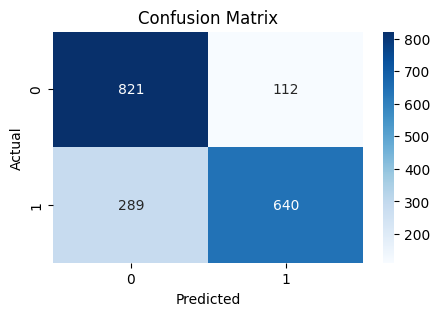

In [9]:
###########################
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Step 1: Make predictions
y_pred = model.predict(x_test1)
# Step 2: Convert probabilities to binary class labels
y_pred_classes = (y_pred > 0.5).astype("int32")
# Step 3: Compute the confusion matrix
cm = confusion_matrix(y_test1_encoded.argmax(axis=1), y_pred_classes.argmax(axis=1))

# Step 4: Plot the confusion matrix
plt.figure(figsize=(5, 3))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


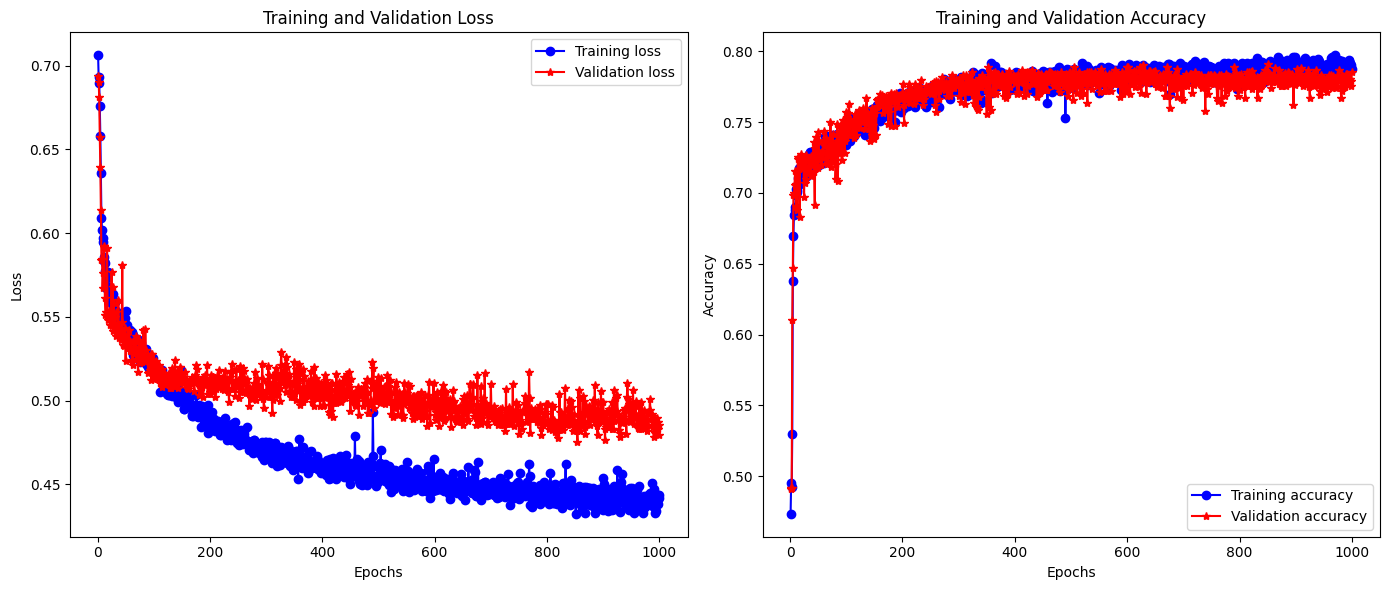

In [10]:
plotaccloss(history)

Modelo 1D-CNN GRU para Ins 

In [8]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Dropout, Dense, LSTM
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Dropout, Dense, GRU
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

model = Sequential()
model.add(Conv1D(32, kernel_size=3, activation='relu', input_shape=(1024, 1)))
model.add(Conv1D(8, kernel_size=3, activation='relu'))
model.add(MaxPooling1D(pool_size=16))
model.add(Conv1D(8, kernel_size=3, activation='relu'))
model.add(MaxPooling1D(pool_size=4))
model.add(Dropout(0.5))
model.add(GRU(8, return_sequences=False))
model.add(Dropout(0.5))
model.add(Dense(16, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(units=num_classes, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

history = model.fit(x_train1_ins, y_train1_encoded_ins, epochs=n_epochs, batch_size=batch_size, validation_split=0.3)

loss, accuracy = model.evaluate(x_test1_ins, y_test1_encoded_ins, verbose=0)
print(f'Test Loss: {loss}, Test Accuracy: {accuracy}')




/home/pece/patrones/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2024-06-12 16:00:20.452343: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:984] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-06-12 16:00:20.452443: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:984] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-06-12 16:00:20.452461: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:984] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Y

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                 │ (None, 1022, 32)       │           128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_1 (Conv1D)               │ (None, 1020, 8)        │           776 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d (MaxPooling1D)    │ (None, 63, 8)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_2 (Conv1D)               │ (None, 61, 8)          │           200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_1 (MaxPooling1D)  │ (None, 15, 8)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 15, 8)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru (GRU)                       │ (None, 8)              │           432 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 8)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 16)             │           144 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 2)              │            18 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,834 (7.16 KB)

 Trainable params: 1,834 (7.16 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/1000


2024-06-12 16:00:22.580582: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:465] Loaded cuDNN version 8907


56/56 ━━━━━━━━━━━━━━━━━━━━ 4s 23ms/step - accuracy: 0.5097 - loss: 0.6959 - val_accuracy: 0.5671 - val_loss: 0.6896
Epoch 2/1000
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.5321 - loss: 0.6921 - val_accuracy: 0.5780 - val_loss: 0.6868
Epoch 3/1000
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.5540 - loss: 0.6885 - val_accuracy: 0.5956 - val_loss: 0.6849
Epoch 4/1000
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.5855 - loss: 0.6839 - val_accuracy: 0.6169 - val_loss: 0.6776
Epoch 5/1000
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.5916 - loss: 0.6768 - val_accuracy: 0.5650 - val_loss: 0.6653
Epoch 6/1000
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.6163 - loss: 0.6581 - val_accuracy: 0.5278 - val_loss: 0.7100
Epoch 7/1000
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.6168 - loss: 0.6425 - val_accuracy: 0.6236 - val_loss: 0.6395
Epoch 8/1000
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.6403 - loss: 0.6255 - val_accuracy: 0.4964 

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


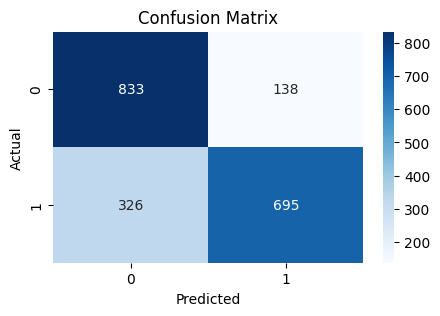

In [9]:
###########################
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Step 1: Make predictions
y_pred = model.predict(x_test1_ins)
# Step 2: Convert probabilities to binary class labels
y_pred_classes = (y_pred > 0.5).astype("int32")
# Step 3: Compute the confusion matrix
cm = confusion_matrix(y_test1_encoded_ins.argmax(axis=1), y_pred_classes.argmax(axis=1))

# Step 4: Plot the confusion matrix
plt.figure(figsize=(5, 3))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


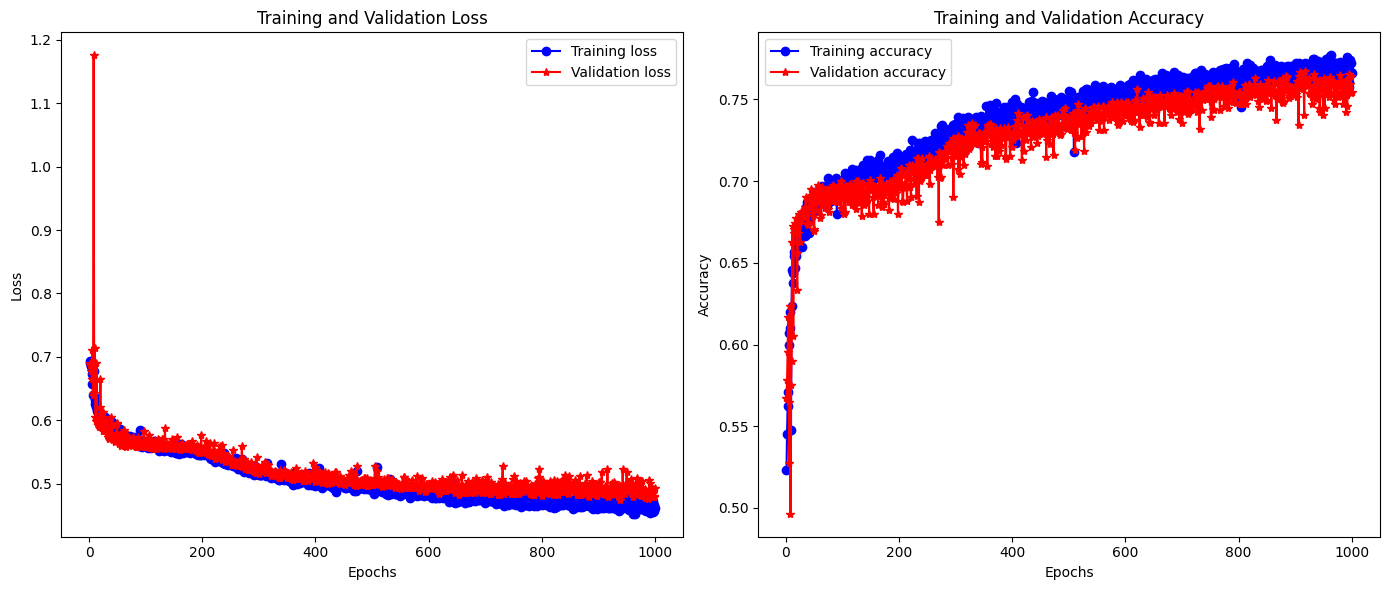

In [10]:
plotaccloss(history)


Modelo 1D-CNN GRU para Narco

In [11]:
model = Sequential()
model.add(Conv1D(32, kernel_size=3, activation='relu', input_shape=(1024, 1)))
model.add(Conv1D(8, kernel_size=3, activation='relu'))
model.add(MaxPooling1D(pool_size=16))
model.add(Conv1D(8, kernel_size=3, activation='relu'))
model.add(MaxPooling1D(pool_size=4))
model.add(Dropout(0.5))
model.add(GRU(8, return_sequences=False))
model.add(Dropout(0.5))
model.add(Dense(16, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(units=num_classes, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

history = model.fit(x_train1_narco, y_train1_encoded_narco, epochs=n_epochs, batch_size=batch_size, validation_split=0.3)

loss, accuracy = model.evaluate(x_test1_narco, y_test1_encoded_narco, verbose=0)
print(f'Test Loss: {loss}, Test Accuracy: {accuracy}')


/home/pece/patrones/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d_3 (Conv1D)               │ (None, 1022, 32)       │           128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_4 (Conv1D)               │ (None, 1020, 8)        │           776 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_2 (MaxPooling1D)  │ (None, 63, 8)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_5 (Conv1D)               │ (None, 61, 8)          │           200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_3 (MaxPooling1D)  │ (None, 15, 8)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 15, 8)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_1 (GRU)                     │ (None, 8)              │           432 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 8)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 16)             │           144 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 2)              │            18 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,834 (7.16 KB)

 Trainable params: 1,834 (7.16 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/1000
54/54 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - accuracy: 0.5012 - loss: 0.7006 - val_accuracy: 0.4922 - val_loss: 0.6932
Epoch 2/1000
54/54 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.4932 - loss: 0.6937 - val_accuracy: 0.4935 - val_loss: 0.6930
Epoch 3/1000
54/54 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.5158 - loss: 0.6923 - val_accuracy: 0.5384 - val_loss: 0.6929
Epoch 4/1000
54/54 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.5099 - loss: 0.6924 - val_accuracy: 0.5789 - val_loss: 0.6906
Epoch 5/1000
54/54 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.5444 - loss: 0.6897 - val_accuracy: 0.5815 - val_loss: 0.6833
Epoch 6/1000
54/54 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.5494 - loss: 0.6848 - val_accuracy: 0.5859 - val_loss: 0.6799
Epoch 7/1000
54/54 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.5585 - loss: 0.6824 - val_accuracy: 0.6321 - val_loss: 0.6584
Epoch 8/1000
54/54 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.6027 - loss: 0.6644 - val_accu

60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


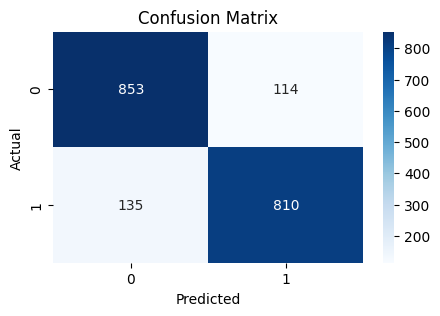

In [12]:
###########################
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Step 1: Make predictions
y_pred = model.predict(x_test1_narco)
# Step 2: Convert probabilities to binary class labels
y_pred_classes = (y_pred > 0.5).astype("int32")
# Step 3: Compute the confusion matrix
cm = confusion_matrix(y_test1_encoded_narco.argmax(axis=1), y_pred_classes.argmax(axis=1))

# Step 4: Plot the confusion matrix
plt.figure(figsize=(5, 3))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


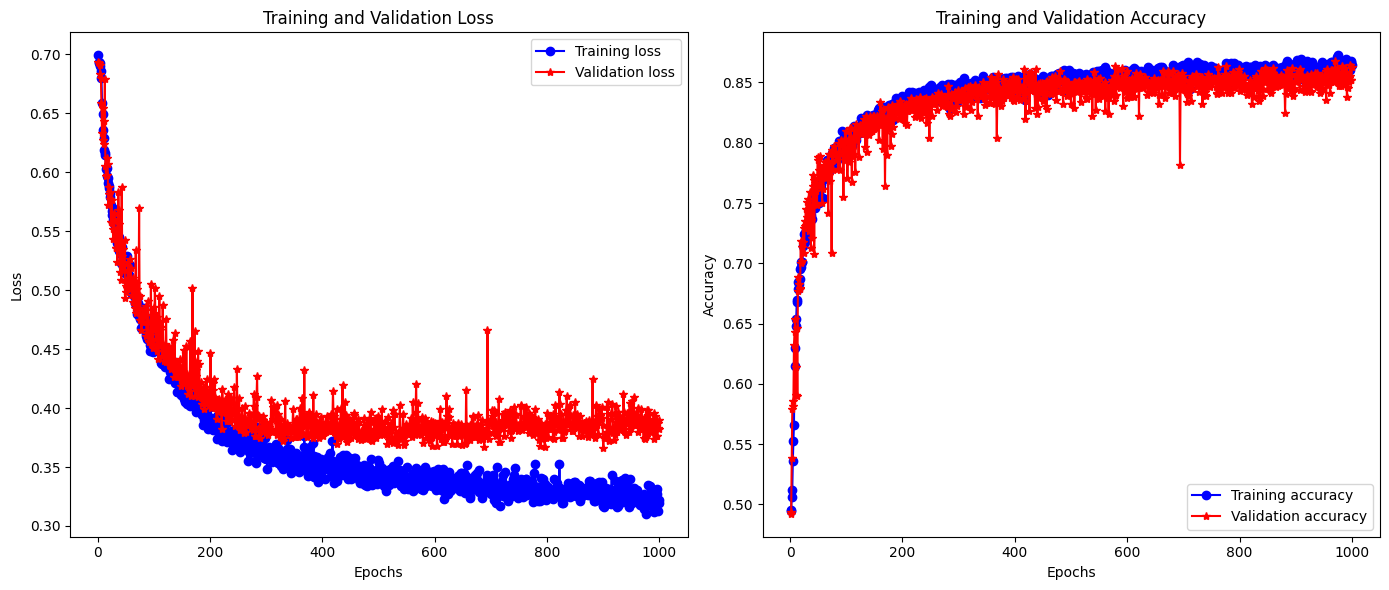

In [13]:
plotaccloss(history)

Modelo 1D-CNN GRU para PLM

In [14]:
model = Sequential()
model.add(Conv1D(32, kernel_size=3, activation='relu', input_shape=(1024, 1)))
model.add(Conv1D(8, kernel_size=3, activation='relu'))
model.add(MaxPooling1D(pool_size=16))
model.add(Conv1D(8, kernel_size=3, activation='relu'))
model.add(MaxPooling1D(pool_size=4))
model.add(Dropout(0.5))
model.add(GRU(8, return_sequences=False))
model.add(Dropout(0.5))
model.add(Dense(16, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(units=num_classes, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

history = model.fit(x_train1_plm, y_train1_encoded_plm, epochs=n_epochs, batch_size=batch_size, validation_split=0.3)

loss, accuracy = model.evaluate(x_test1_plm, y_test1_encoded_plm, verbose=0)
print(f'Test Loss: {loss}, Test Accuracy: {accuracy}')


/home/pece/patrones/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d_6 (Conv1D)               │ (None, 1022, 32)       │           128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_7 (Conv1D)               │ (None, 1020, 8)        │           776 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_4 (MaxPooling1D)  │ (None, 63, 8)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_8 (Conv1D)               │ (None, 61, 8)          │           200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_5 (MaxPooling1D)  │ (None, 15, 8)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 15, 8)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_2 (GRU)                     │ (None, 8)              │           432 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 8)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 16)             │           144 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 2)              │            18 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,834 (7.16 KB)

 Trainable params: 1,834 (7.16 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/1000
101/101 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - accuracy: 0.5062 - loss: 0.7035 - val_accuracy: 0.5473 - val_loss: 0.6895
Epoch 2/1000
101/101 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.5247 - loss: 0.6906 - val_accuracy: 0.5717 - val_loss: 0.6884
Epoch 3/1000
101/101 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.5409 - loss: 0.6888 - val_accuracy: 0.5247 - val_loss: 0.6893
Epoch 4/1000
101/101 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.5824 - loss: 0.6788 - val_accuracy: 0.5043 - val_loss: 0.7246
Epoch 5/1000
101/101 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.5916 - loss: 0.6641 - val_accuracy: 0.5045 - val_loss: 0.7561
Epoch 6/1000
101/101 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.6300 - loss: 0.6399 - val_accuracy: 0.5066 - val_loss: 0.7456
Epoch 7/1000
101/101 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.6636 - loss: 0.6187 - val_accuracy: 0.5082 - val_loss: 0.7320
Epoch 8/1000
101/101 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.6670 - loss: 0

113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


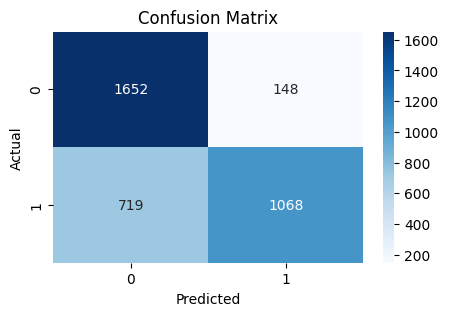

In [15]:
# Step 1: Make predictions
y_pred = model.predict(x_test1_plm)
# Step 2: Convert probabilities to binary class labels
y_pred_classes = (y_pred > 0.5).astype("int32")
# Step 3: Compute the confusion matrix
cm = confusion_matrix(y_test1_encoded_plm.argmax(axis=1), y_pred_classes.argmax(axis=1))

# Step 4: Plot the confusion matrix
plt.figure(figsize=(5, 3))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

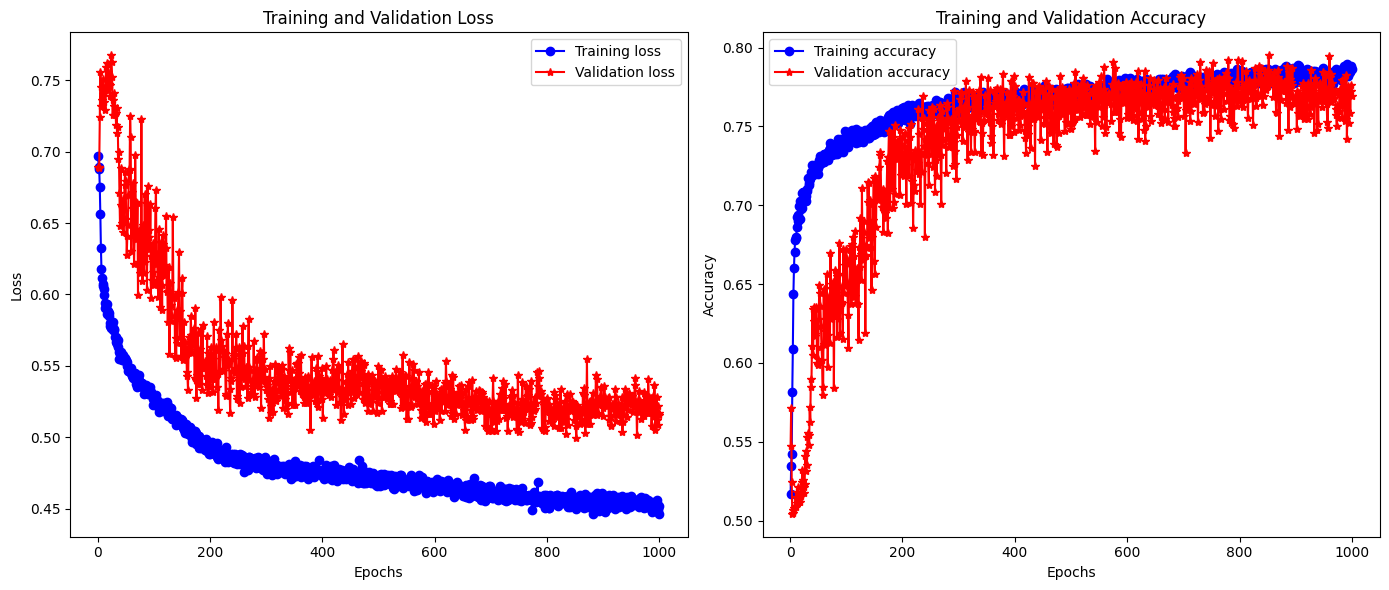

In [16]:
plotaccloss(history)